# 1) Represente cada aluno por uma Face de Chernoff. A partir delas, você julga que há alunos que apresentem um histórico no ENEM e CRA do primeiro período similar entre si? Ou não?

In [ ]:
install.packages('TeachingDemos')
library(TeachingDemos)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
astro = read.table('/content/ENEM_Astro.csv', sep=',', header=T)
astro

Nome,Humanas,Natureza,Linguagem,Redacao,Matematica,CRA,ano
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
S1,771.5,693.1,653.4,920,827.8,7.9,2025
G,730.6,719.4,613.9,740,783.7,4.4,2025
M1,649.4,644.0,608.1,940,696.7,8.2,2025
I1,652.9,632.0,646.8,900,779.7,6.8,2025
P,640.0,578.1,675.9,740,730.4,6.2,2025
I2,558.2,632.6,595.7,920,826.6,8.5,2025
L1,707.1,656.5,685.0,900,750.5,6.6,2025
S2,651.1,558.1,539.4,900,544.1,2.4,2025
M2,703.3,670.7,637.6,800,799.4,6.0,2025


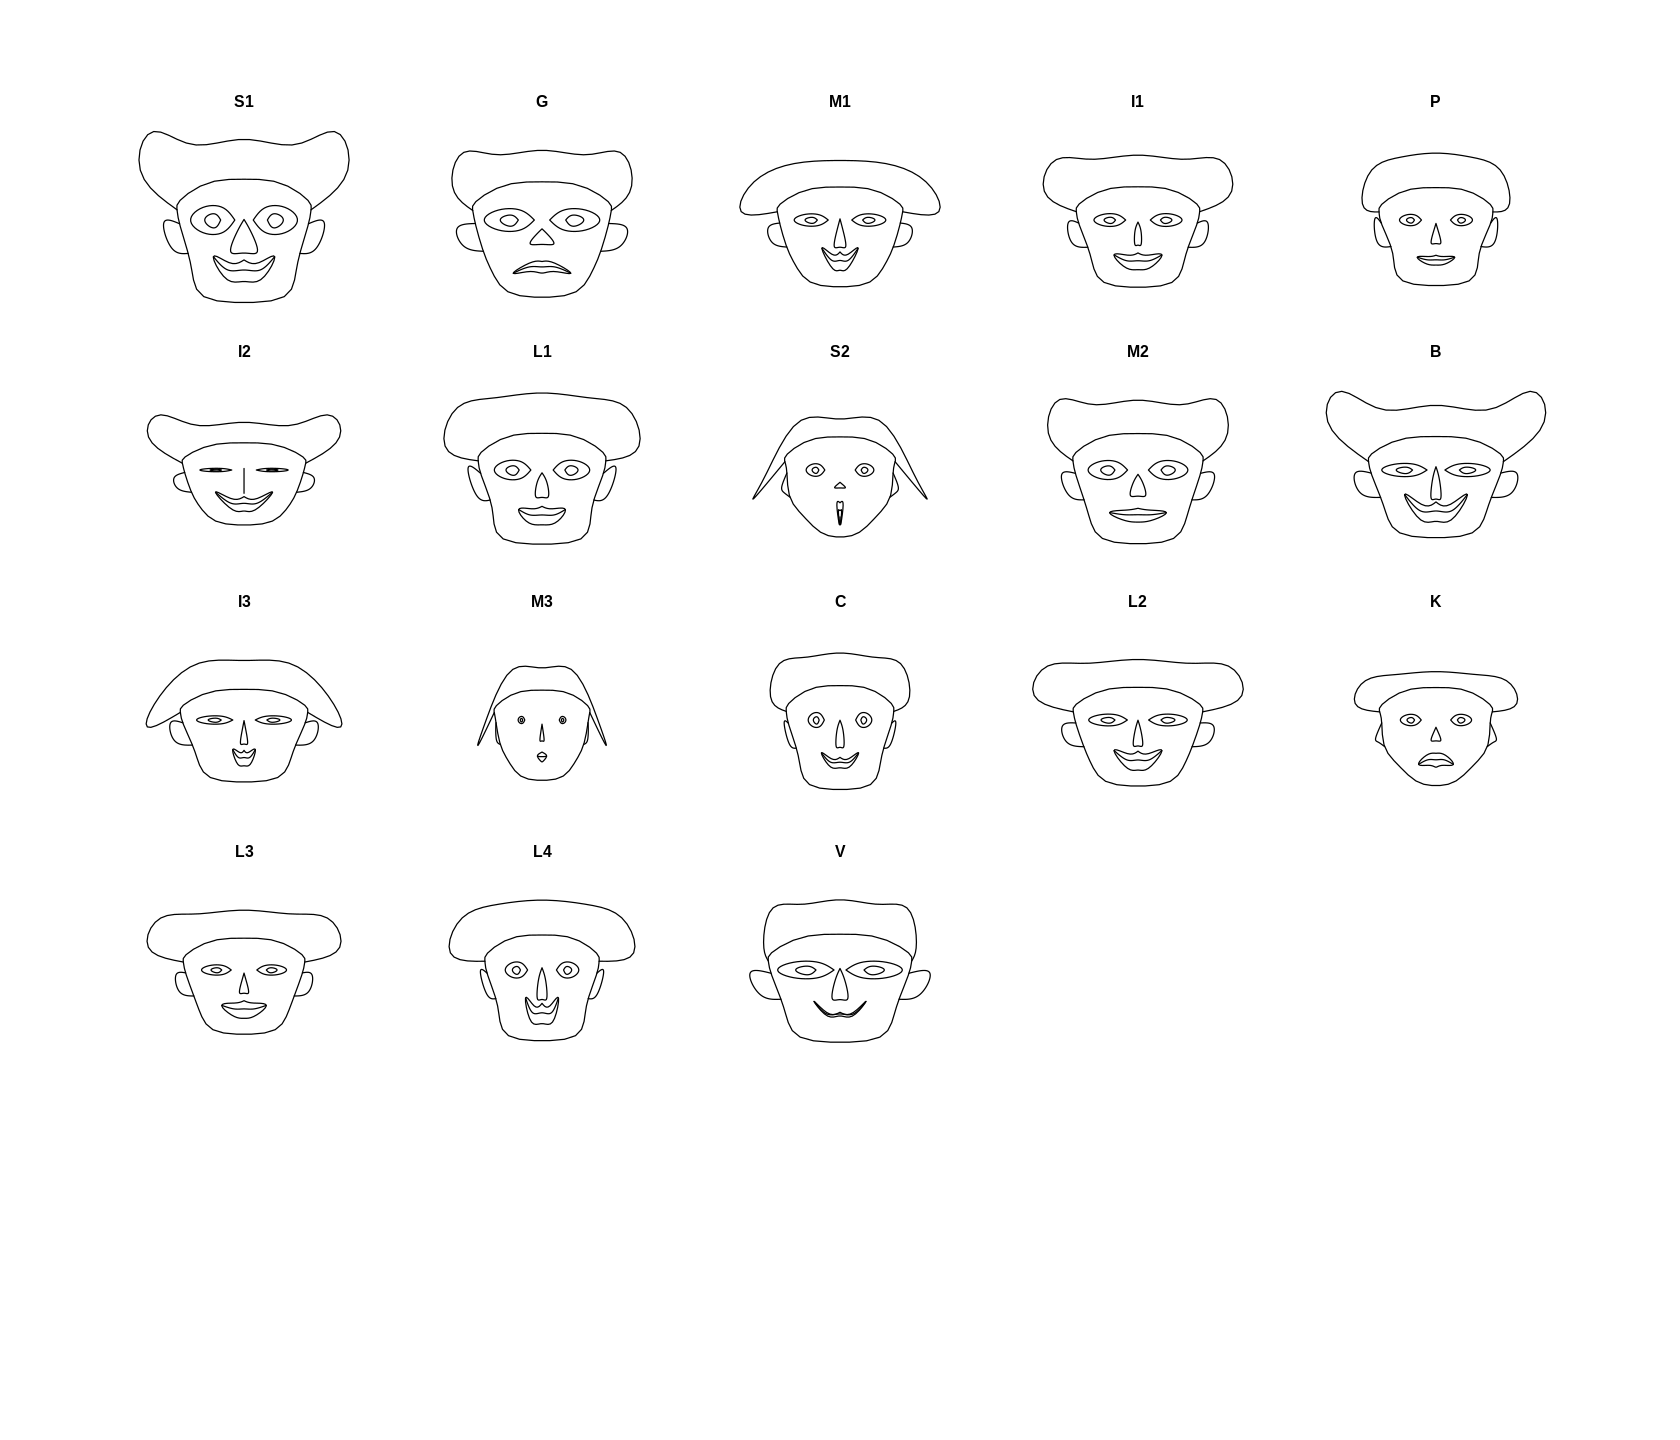

In [ ]:
options(repr.plot.width=14,repr.plot.height=12)
faces(astro[, 2:7], labels = astro$Nome)

# 2) Com base nessas notas, você diria que o CRA do primeiro período é uma função linearmente proporcional ao desempenho do aluno no ENEM?

In [ ]:
install.packages('MASS')
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
enem_mean = rowMeans(astro[,c(2:6)])
cra = astro$CRA

Warning message in cor.test.default(cra, enem_mean, method = "spearman"):
“Cannot compute exact p-value with ties”


In [ ]:
reg = lm(cra ~ enem_mean,method='MM')
summary(reg)

Warning message in lm(cra ~ enem_mean, method = "MM"):
“method = 'MM' is not supported. Using 'qr'”



Call:
lm(formula = cra ~ enem_mean, method = "MM")

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0514 -0.9285  0.1149  1.2654  1.8299 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -7.965886   5.982551  -1.332   0.2017  
enem_mean    0.021012   0.008508   2.470   0.0252 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.525 on 16 degrees of freedom
Multiple R-squared:  0.276,	Adjusted R-squared:  0.2308 
F-statistic:   6.1 on 1 and 16 DF,  p-value: 0.02515


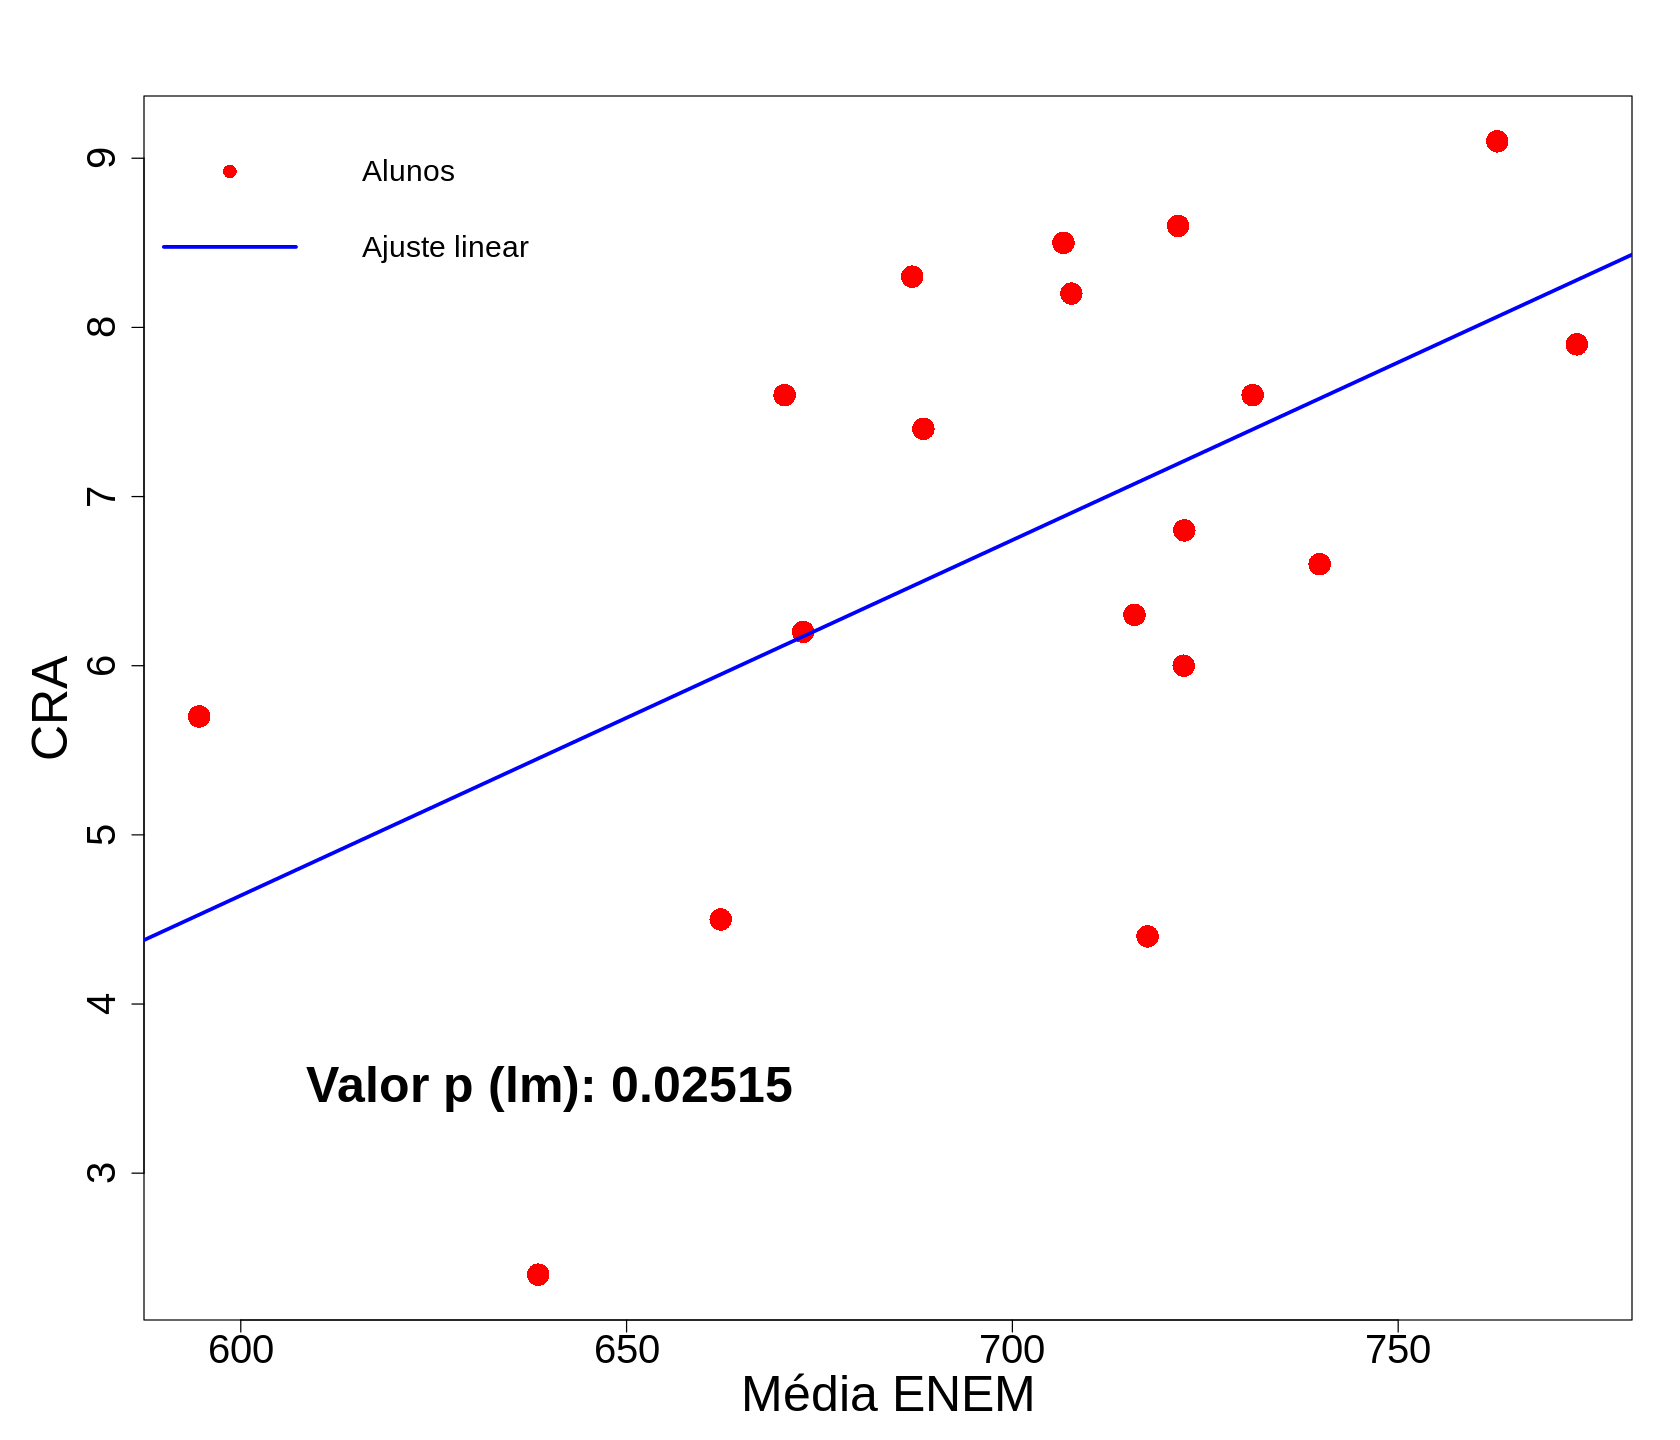

In [ ]:
x = c(min(enem_mean):max(enem_mean),100)
par(mar = c(5, 6, 4, 2))
plot(enem_mean, cra, cex=2.5, col='red',pch=16,xlab='Média ENEM',
     ylab='CRA',cex.lab=2.5,cex.axis=2)
abline(reg, col='blue', lwd=3)
legend('topleft',legend=c('Alunos','Ajuste linear'),col=c('red','blue'),
pch=c(16,NA),lty = c(NA, 1),lwd = c(NA, 3),cex=c(1.5,1.5),bty='n')

text(640, 3.5, 'Valor p (lm): 0.02515',
     cex=2.5,
     font=2)

# 3) Represente a separação entre esses alunos em um plano bidimensional.

In [ ]:
m_dist = dist(scale(astro[,c(2:8)]))
projected = cmdscale(m_dist)

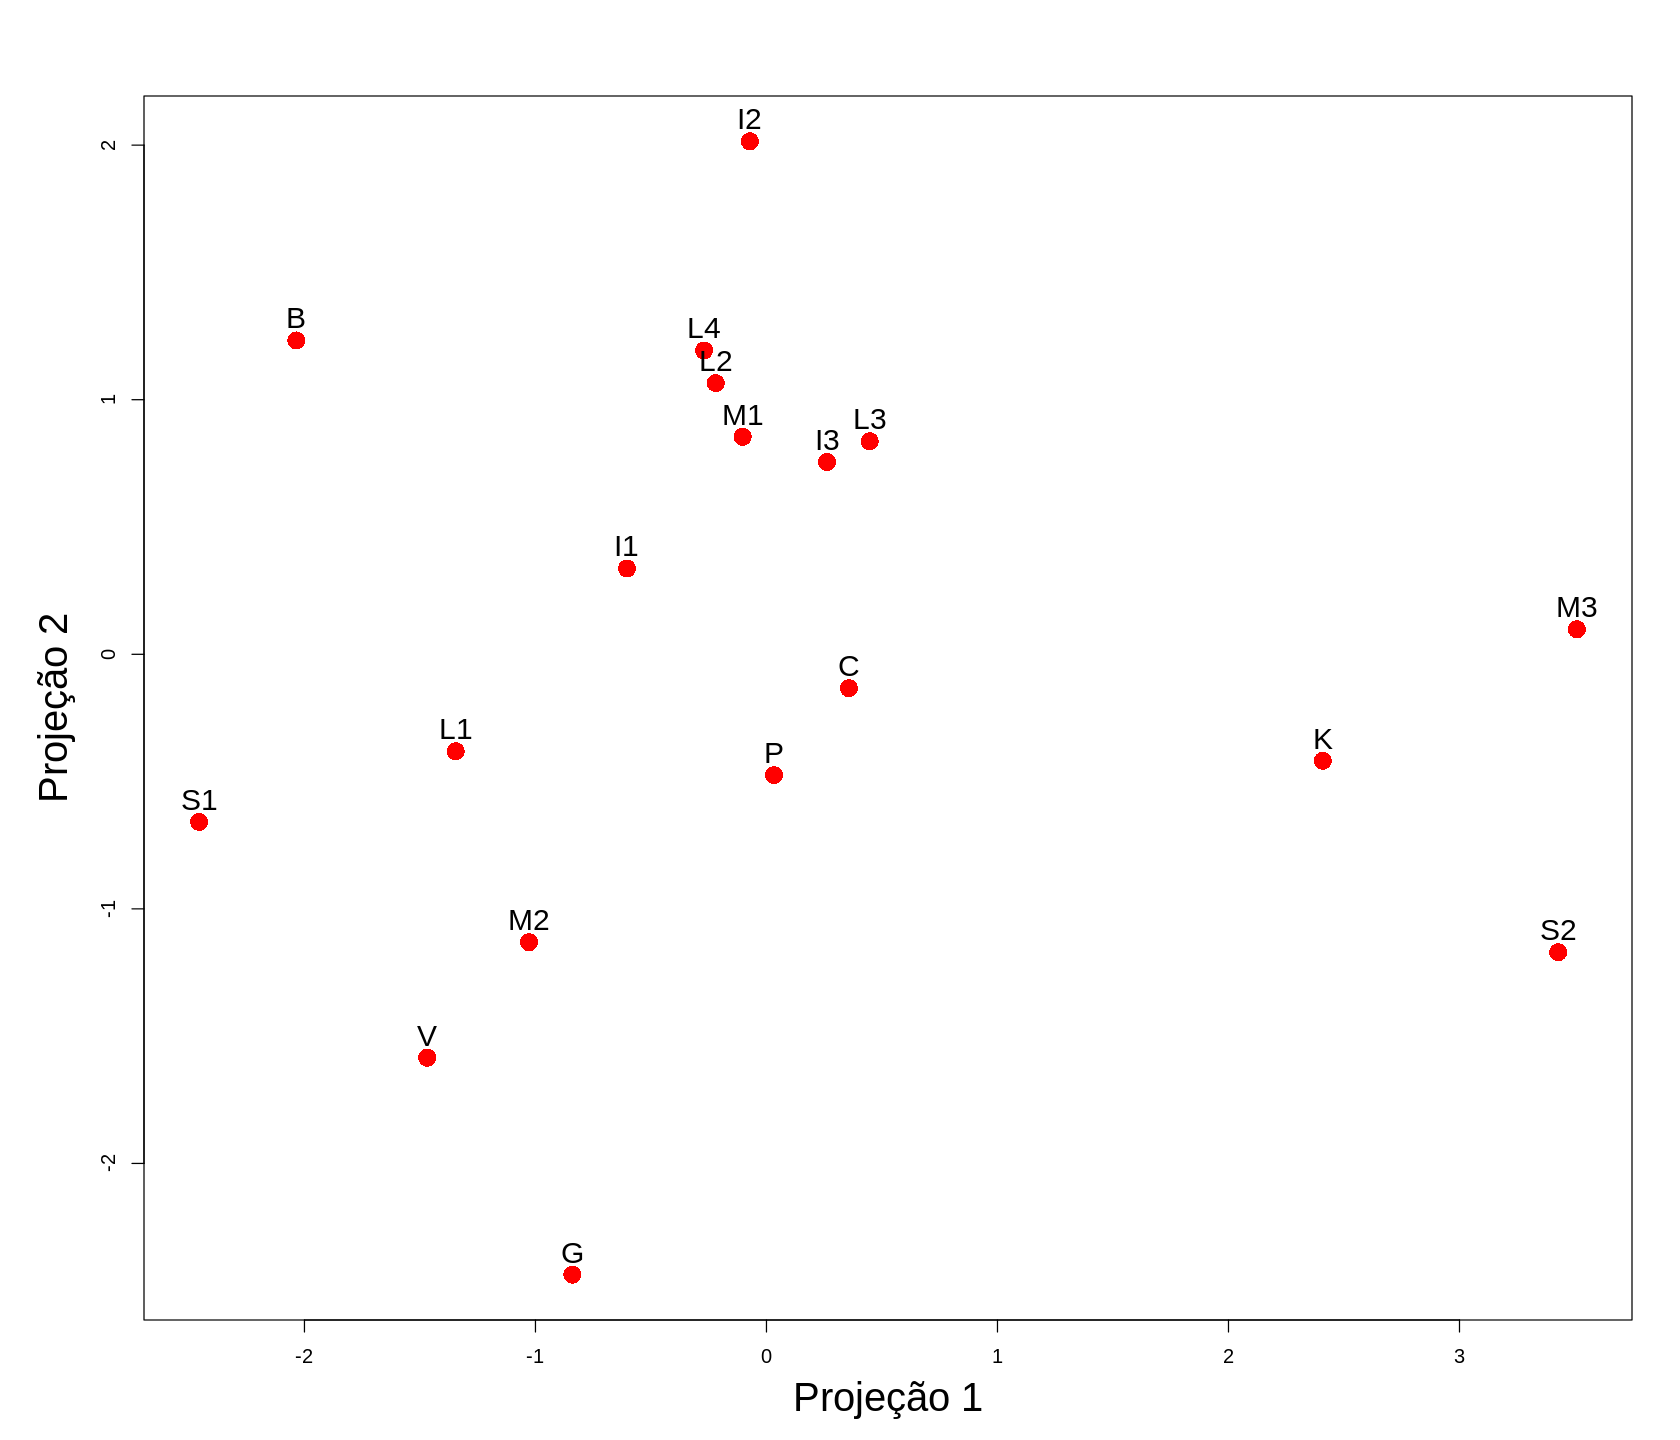

In [ ]:
par(mar = c(5, 6, 4, 2))
plot(projected[,1], projected[,2], cex=2,col='red',
pch=16,xlab='Projeção 1', ylab="Projeção 2", cex.lab=2)
text(projected[,1], projected[,2],
     labels = astro$Nome,
     pos = 3,
     cex = 1.5)

#4) Compare a densidade das notas obtidas pelos alunos de 2024 com as de 2025 em uma figura com 6 paineis, um para cada nota. As distribuições são estatisticamente similares entre os alunos de cada ano?


MANOVA teste para todas as áreas:
          Df  Pillai approx F num Df den Df Pr(>F)
astro$ano  1 0.34372  0.96018      6     11 0.4934
Residuals 16                                      


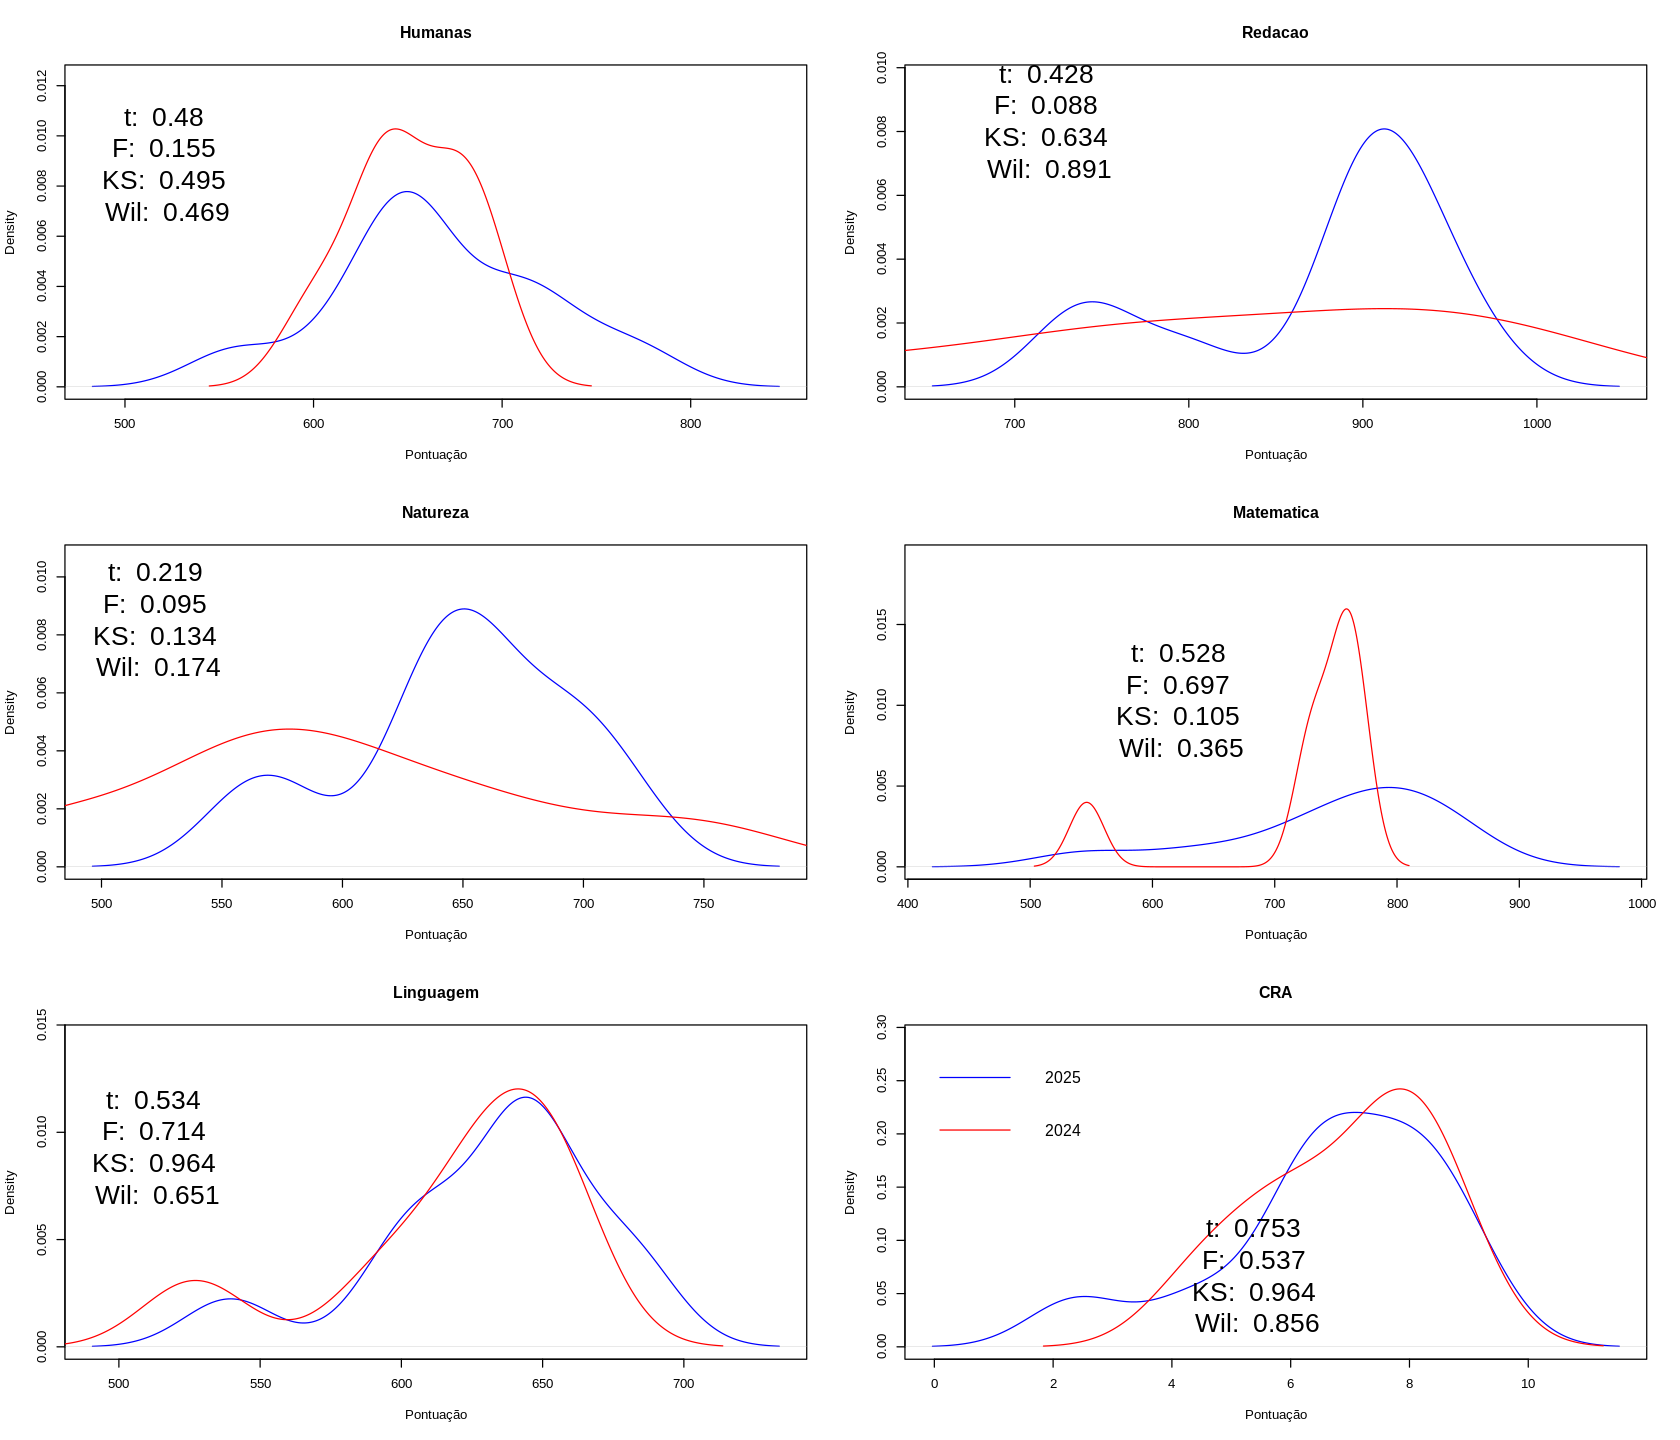

In [ ]:
par(mfcol = c(3, 2))

colors = c('blue', 'red')
for (i in 2:7) {
  values_1 = astro[astro$ano == 2025, i]
  values_2 = astro[astro$ano == 2024, i]

  # Tests
  t_test = t.test(values_1, values_2)
  f_test = var.test(values_1, values_2)
  ks_test = ks.test(values_1, values_2)
  wil = wilcox.test(values_1, values_2, exact = FALSE)

  # Plot
  plot(density(values_1), col = colors[1], xlab = 'Pontuação',
       main = colnames(astro)[i], ylim = c(0, max(density(values_1)$y,
        density(values_2)$y) * 1.2))
  lines(density(values_2), col = colors[2])

  # Add text
  text_x = median(median(values_1),median(values_2)) *0.8
  y_start = 0.007

  text(text_x, y_start*0.9,     paste("t: ", round(t_test$p.value, 3),
  "\nF: ", round(f_test$p.value, 3),
  "\nKS: ", round(ks_test$p.value, 3),
  "\nWil: ", round(wil$p.value, 3)), pos = 3, cex=2)
}

legend('topleft', legend = c(2025, 2024), col = colors, lty = 1, bty = 'n',
cex = 1.2)
# MANOVA
man_test = manova(as.matrix(astro[,2:7]) ~ astro$ano)
cat("\nMANOVA teste para todas as áreas:\n")
print(summary(man_test))

# 5) A galáxia NGC 5548 hospeda um AGN classificado como Seyfert 1. Peterson et al. (1999) observaram seu fluxo durante 8 anos no contínuo óptico (em 5100 Å) e na linha Hβ . O arquivo NGC5548.dat contém a data juliana da observação (JD), os fluxos no contínuo óptico e na linha Hβ (F5100 e FHbeta), bem como seus respectivos erros (e_F5100 e e_FHbeta). Os fluxos estão medidos em erg cm−2 s−1 Å−1

### a) Suponha que seja possível descrever o fluxo no contínuo óptico deste AGN a partir do fluxo na linha Hβ, e que apenas essas duas informações sejam conhecidas. Que parametrização seria essa?

In [ ]:
ngc = read.table('/content/NGC5548.dat', sep='|', header = T)
ngc = ngc[complete.cases(ngc),]

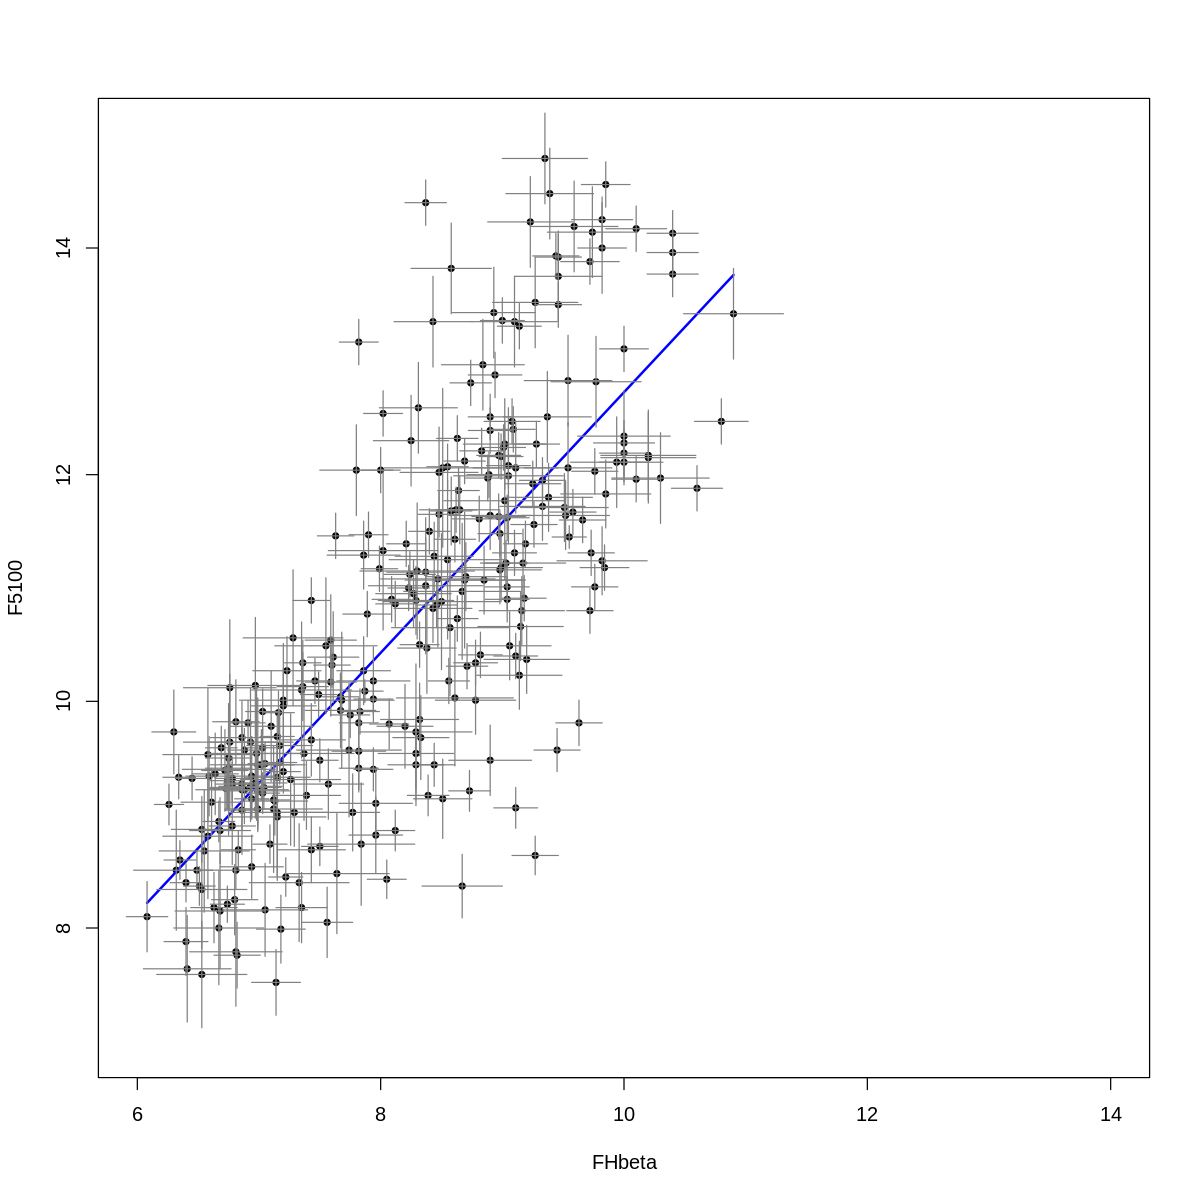

In [ ]:
options(repr.plot.width=10,repr.plot.height=10)

fit = lm(F5100 ~ FHbeta, data = ngc)

x_vals = seq(min(ngc$FHbeta), max(ngc$FHbeta), length.out = 200)
y_pred = predict(fit, newdata = data.frame(FHbeta = x_vals))

plot(ngc$FHbeta, ngc$F5100, pch=20, xlab="FHbeta", ylab="F5100",
xlim=c(6,14), ylim=c(7,15))
lines(x_vals, y_pred, col = "blue", lwd = 2)

for (i in 1:length(ngc$FHbeta)) {
  lines(
    c(ngc$FHbeta[i], ngc$FHbeta[i]),
    c(ngc$F5100[i] + ngc$e_F5100[i], ngc$F5100[i] - ngc$e_F5100[i]),
    col=gray(0.5)
    )
  lines(
    c(ngc$FHbeta[i] + ngc$e_FHbeta[i], ngc$FHbeta[i] - ngc$e_FHbeta[i]),
    c(ngc$F5100[i], ngc$F5100[i]),
    col=gray(0.5)
    )
}

### b) Suponha agora que as medidas de erro sejam conhecidas. Critique o resultado obtido acima com base no que esses erros indicam.

In [ ]:
rms_rel_F5100 = sqrt(mean((ngc$e_F5100 / ngc$F5100)^2))
rms_rel_FHbeta = sqrt(mean((ngc$e_FHbeta / ngc$FHbeta)^2))

cat("Erro RMS relativo em F5100:", round(rms_rel_F5100, 3), "\n")
cat("Erro RMS relativo em FHbeta:", round(rms_rel_FHbeta, 3), "\n")

Erro RMS relativo em F5100: 0.033 
Erro RMS relativo em FHbeta: 0.034 


### c) Conhecendo os valores medidos para os fluxos e seus erros estimados, sugira uma parametrização mais adequada. Explique por que ela é mais adequada a esse proble ma e como ela foi obtida.

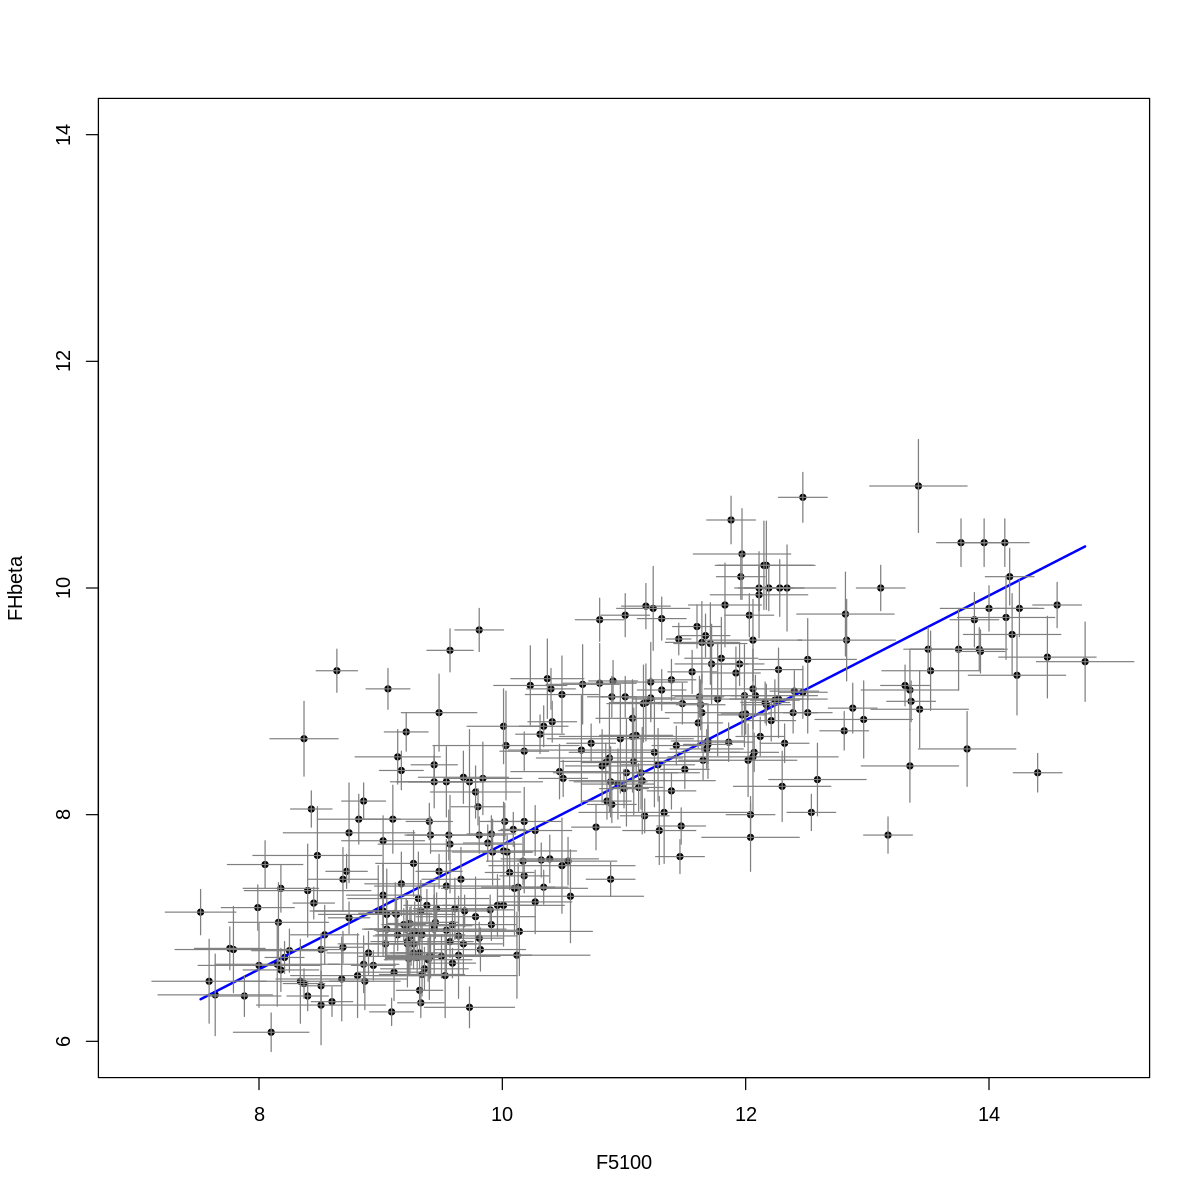

In [ ]:
weight = 1 / (ngc$e_FHbeta * ngc$e_FHbeta)

fit = lm(FHbeta ~ F5100, data = ngc, weights = weight)

x_vals = seq(min(ngc$F5100), max(ngc$F5100), length.out = 200)
y_pred = predict(fit, newdata = data.frame(F5100 = x_vals))

plot(ngc$F5100, ngc$FHbeta, pch = 20, ylab = "FHbeta", xlab = "F5100",
ylim=c(6,14), xlim=c(7,15))
lines(x_vals, y_pred, col = "blue", lwd = 2)

for (i in 1:nrow(ngc)) {
  lines(
    c(ngc$F5100[i] - ngc$e_F5100[i], ngc$F5100[i] + ngc$e_F5100[i]),
    c(ngc$FHbeta[i], ngc$FHbeta[i]),
    col = gray(0.5)
  )

  lines(
    c(ngc$F5100[i], ngc$F5100[i]),
    c(ngc$FHbeta[i] - ngc$e_FHbeta[i], ngc$FHbeta[i] + ngc$e_FHbeta[i]),
    col = gray(0.5)
  )
}

# 6) Transforme as cores em magnitudes U, B, R e I, e junte essas magnitudes à V em uma nova dataframe. Aplique a técnica de componentes principais nesta dataframe formada apenas por magnitudes aparentes.

In [ ]:
catalog = read.table('/content/king5.tsv', sep='|', header=T)

In [ ]:
Bmag = catalog$BV+catalog$Vmag
Umag = catalog$UB+Bmag
Rmag = -(catalog$VR-catalog$Vmag)
Imag = -(catalog$VI-catalog$Vmag)

new_df = data.frame(Umag = Umag, Bmag = Bmag, Vmag = catalog$Vmag, Rmag = Rmag,
 Imag = Imag
)

new_df = new_df[complete.cases(new_df),]
# PCA
pca = prcomp(new_df)

### a) Quantas componentes principais poderiam explicar apropriadamente a distribuição das estrelas nesse espaço de magnitudes?

In [ ]:
summary(pca) # 2 componentes -> 99.5%

Importance of components:
                          PC1     PC2     PC3     PC4     PC5
Standard deviation     2.7876 0.42396 0.17145 0.04079 0.03337
Proportion of Variance 0.9735 0.02252 0.00368 0.00021 0.00014
Cumulative Proportion  0.9735 0.99597 0.99965 0.99986 1.00000

### b) Interprete. O que deve significar fisicamente os dois primeiros componentes principais?

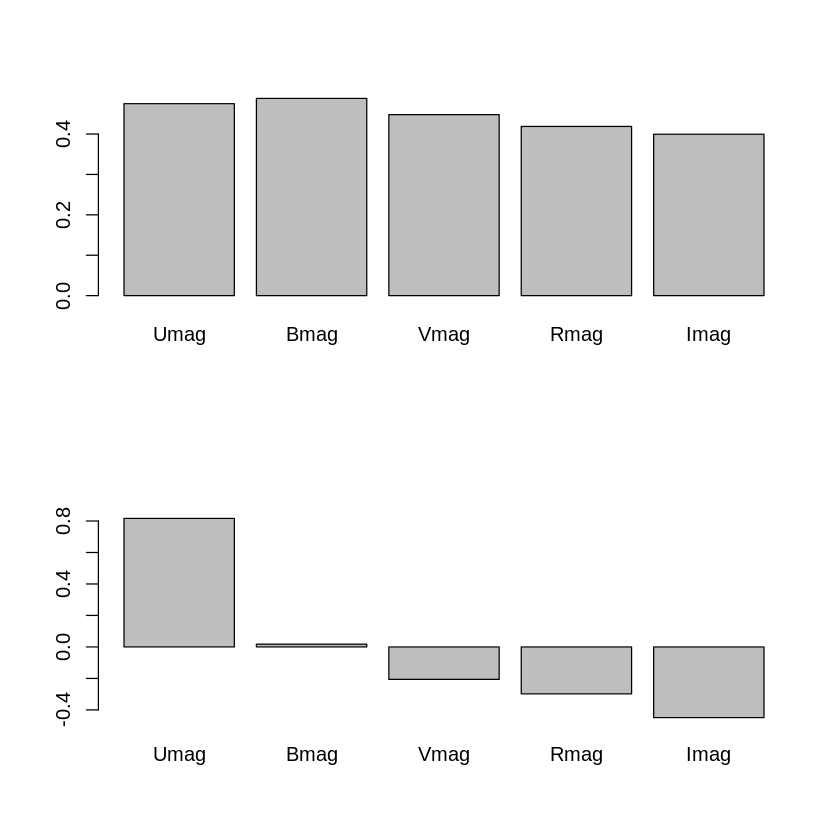

In [ ]:
par(mfrow=c(2,1))
barplot(pca$rotation[,1]) # Brilho
barplot(pca$rotation[,2]) # Cor

# c) Quais seriam as magnitudes de uma estrela hipotética que pudesse ser representada no espaço de componentes principais pelas coordenadas (0.2, 0.43, 0.6, 0.8, 0.4)?

In [ ]:
pca_vector = c(0.2, 0.43, 0.6, 0.8, 0.4)
mags = c()
for (i in c(1:5)){
  mag = sum(pca$rotation[i,] * pca_vector) + mean(new_df[,i])
  mags = c(mags,mag)
}
cat('Magnitudes (U,B,V,R,I): ',mags)

Magnitudes (U,B,V,R,I):  19.74012 17.93687 17.82269 16.01448 16.04089

# 7) Aplique uma decomposição de misturas às magnitudes U, B, V, R e I do aglomerado King 5 considerando que cada componente seja uma normal multivariacional.

In [ ]:
install.packages('mclust')
library(mclust)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



In [ ]:
model = Mclust(new_df,modelNames = 'VVV')

### a) Quantas componentes normais multivariacionais são necessárias para explicar a distribuição dessas magnitudes?

In [ ]:
summary(model)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 3
components: 

 log-likelihood   n df      BIC      ICL
       618.4788 189 62 911.9692 886.6007

Clustering table:
 1  2  3 
37 85 67 

### b) Quais são as magnitudes médias e a matriz de covariância de cada uma dessas componentes?

In [ ]:
for (i in c(1:3)){
  cat('\nMédia da componente',i,':',model$parameters$mean[,i])
}


Média da componente 1 : 19.08092 18.2044 16.9453 16.21884 15.41783
Média da componente 2 : 18.29859 17.73985 16.61541 15.98515 15.26787
Média da componente 3 : 20.14439 19.56443 18.22695 17.45339 16.62603

In [ ]:
for (i in 1:3) {
  cat('Matriz componente', i, ':\n')
  print(model$parameters$variance$sigma[,,i])
  cat('\n')
}

Matriz componente 1 :
         Umag     Bmag     Vmag     Rmag     Imag
Umag 3.645411 3.224176 2.959774 2.766449 2.650813
Bmag 3.224176 3.386730 3.149322 2.955543 2.866553
Vmag 2.959774 3.149322 2.993255 2.820833 2.780000
Rmag 2.766449 2.955543 2.820833 2.674180 2.646377
Imag 2.650813 2.866553 2.780000 2.646377 2.660136

Matriz componente 2 :
          Umag      Bmag      Vmag      Rmag      Imag
Umag 0.7108262 0.7305238 0.6625979 0.6187826 0.5740213
Bmag 0.7305238 0.7592262 0.6867012 0.6400591 0.5929057
Vmag 0.6625979 0.6867012 0.6250097 0.5855402 0.5447514
Rmag 0.6187826 0.6400591 0.5855402 0.5511798 0.5147319
Imag 0.5740213 0.5929057 0.5447514 0.5147319 0.4824006

Matriz componente 3 :
          Umag      Bmag      Vmag      Rmag      Imag
Umag 0.3867627 0.4024006 0.3650820 0.3445183 0.3291485
Bmag 0.4024006 0.4465300 0.4134285 0.3957304 0.3819135
Vmag 0.3650820 0.4134285 0.3919677 0.3794756 0.3695648
Rmag 0.3445183 0.3957304 0.3794756 0.3711844 0.3638454
Imag 0.3291485 0.3819135 0.

### c) Faça dois diagramas cor—magnitude, um ao lado do outro. O primeiro deve ser B−V × V; o segundo deve ser R−I × R. Use o argumento col do comando plot para identificar cada objeto com base na classificação atribuída a ele pela decomposição de misturas.

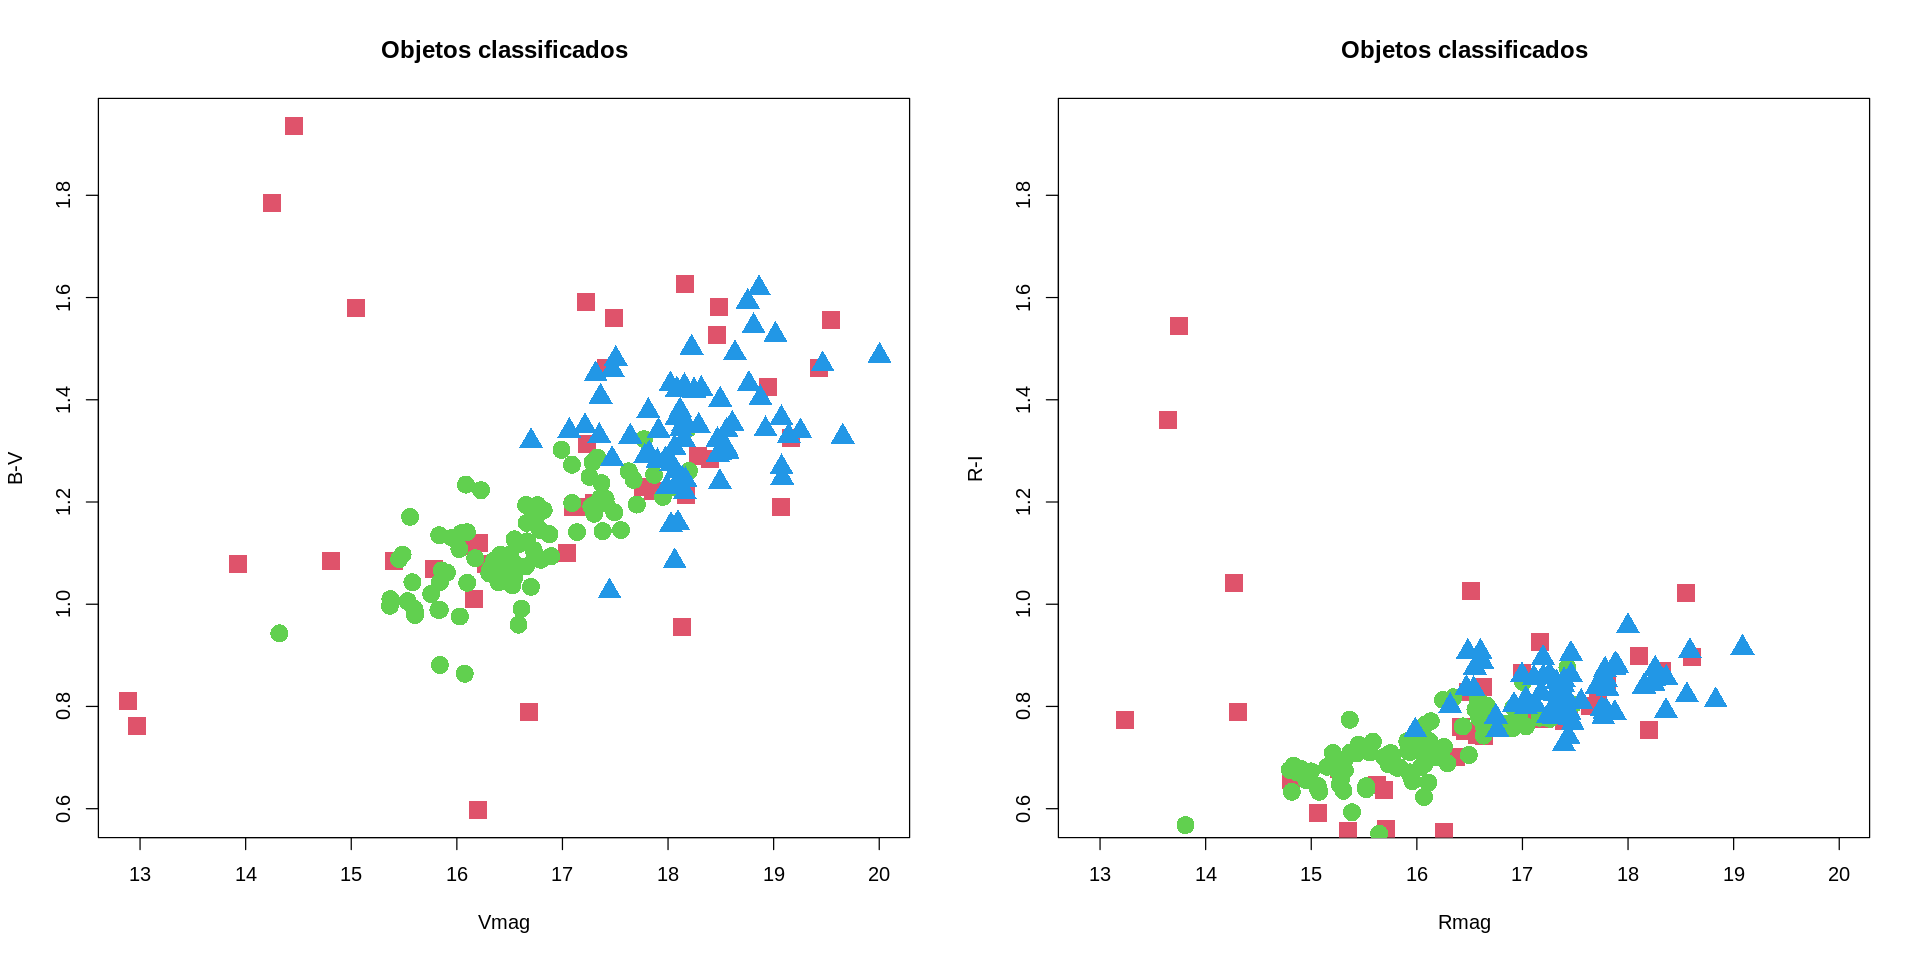

In [ ]:
options(repr.plot.width=16,repr.plot.height=8)
par(mfrow=c(1,2))
plot(c(), xlim=range(new_df$Vmag), ylim=range(new_df$Bmag - new_df$Vmag),
     xlab="Vmag", ylab="B-V", main="Objetos classificados")
for (i in c(1:3)){
  sub_df = new_df[model$classification==i,]
  points(sub_df$Vmag,sub_df$Bmag-sub_df$Vmag, col=1+i, pch=14+i,cex=2)
}

plot(c(), xlim=range(new_df$Vmag), ylim=range(new_df$Bmag - new_df$Vmag),
     xlab="Rmag", ylab="R-I", main="Objetos classificados")
for (i in c(1:3)){
  sub_df = new_df[model$classification==i,]
  points(sub_df$Rmag,sub_df$Rmag-sub_df$Imag, col=1+i, pch=14+i,cex=2)
}

# 8) Tasse et al. (2011) mediu a emissão de raios x em AGNs para estudar a relação entre a atividade do AGN e a taxa de formação estelar na galáxia hospedeira. Seus dados se encontram no arquivo xrays_tasse.tsv. As colunas são nome do AGN (Name), log fluxo em raios X moles (logFxs), log fluxo em raios X duros (logFxh), magnitudes gmag, rmag e imag, desvio para o vermelho (zph), logaritmo da massa da galáxia (logM) e logaritmo da taxa de formação estelar (logSFR).

In [ ]:
agns = read.table('/content/xrays_tasse.tsv', header=T, sep='|')
agns = agns[complete.cases(agns),]

### a) Faça um gráfico de logFxs versus logFxh. Sobreponha a este gráfico as seguintes curvas de regressão, cada uma com cor diferente: OLS, regressão quantílica da mediana, estimador de Nadaraya-Watson e LOESS.

In [ ]:
install.packages('quantreg')
library(quantreg)
install.packages("np")
library(np)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’


Loading required package: SparseM

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cubature’, ‘quadprog’


Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-18)
[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]



In [ ]:
fit_ols = lm(logFxs ~ logFxh, data = agns)
fit_qtl = rq(logFxs ~ logFxh, data = agns, tau = 0.5)
fit_nw = npreg(logFxs ~ logFxh, data = agns, bws = 0.2)
fit_loe = loess(logFxs ~ logFxh, data = agns)

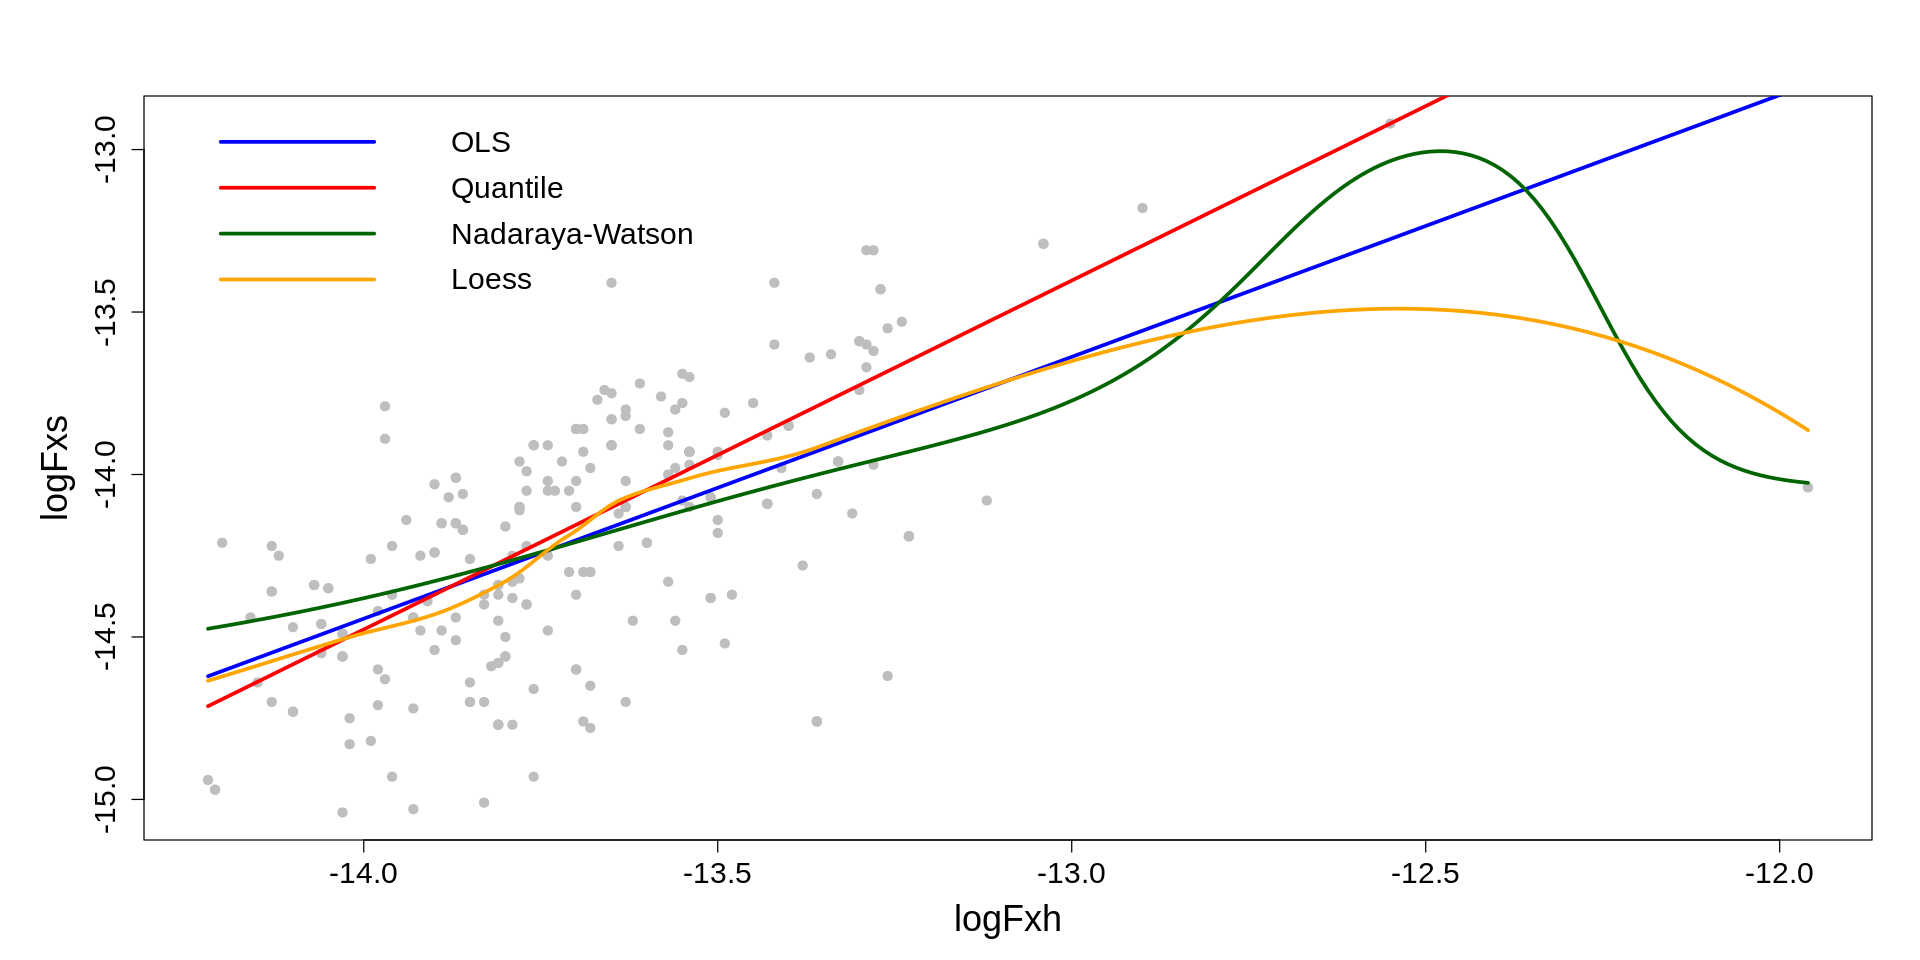

In [ ]:
options(repr.plot.width=16, repr.plot.height=8)
x = seq(min(agns$logFxh), max(agns$logFxh), length.out = 200)
x_df = data.frame(logFxh = x)
par(mar = c(5, 6, 4, 2))
plot(agns$logFxh, agns$logFxs, pch=19, col='gray', xlab='logFxh', ylab='logFxs',
 cex.lab=1.8, cex.axis=1.5)
lines(x, predict(fit_ols, newdata = x_df), col='blue', lwd=3)
lines(x, predict(fit_qtl, newdata = x_df), col='red', lwd=3)
lines(x, predict(fit_nw, exdat = x_df), col='darkgreen', lwd=3)
lines(x, predict(fit_loe, newdata = x_df), col='orange', lwd=3)
legend('topleft', legend=c('OLS', 'Quantile', 'Nadaraya-Watson', 'Loess'),
col=c('blue','red','darkgreen','orange'), lwd=3, cex=1.5, bty='n')

### b) Represente a densidade do espaço logM versus logSFR usando um histograma bidimensional e curvas de contorno.

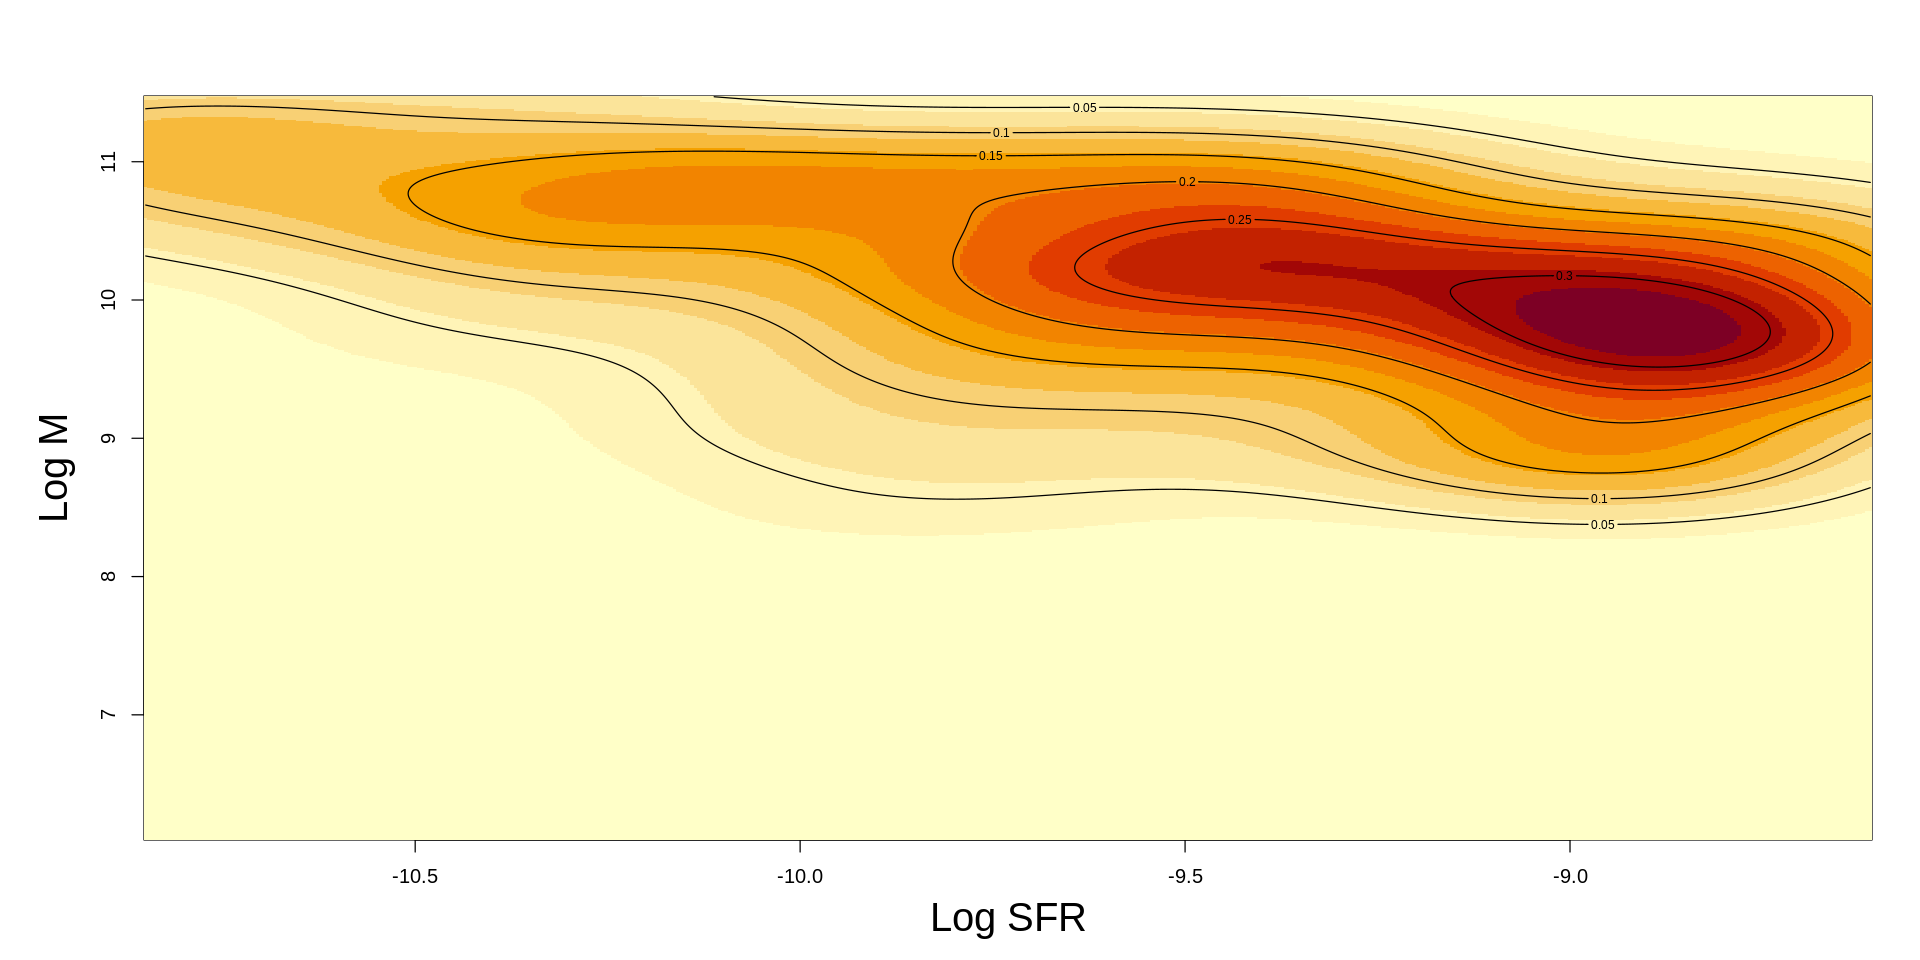

In [ ]:
par(mar = c(5, 6, 4, 2))
kde = kde2d(agns$logSFR, agns$logM, n=500)
image(kde, xlab='Log SFR', ylab='Log M', cex.lab=2)
contour(kde,add=T)

# 9) O arquivo AsteroidClass.tsv contém os dados da fotometria de asteroides obtidos por Popescu et al. (2018). As colunas representam as cores Y−J, J−Ks, H−Ks e a classificação espectroscópica do asteroide. Construa uma árvore de classificação para essa amostra, com base nas cores dos asteroides.

In [ ]:
asteroid = read.table('/content/AsteroidClass.tsv', header=T, sep='|')
asteroid = asteroid[complete.cases(asteroid),]

In [ ]:
install.packages('tree')
library(tree)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
arv = tree(as.factor(Class) ~ HKs + JKs + YJ , data=asteroid)
summary(arv)


Classification tree:
tree(formula = as.factor(Class) ~ HKs + JKs + YJ, data = asteroid)
Number of terminal nodes:  9 
Residual mean deviance:  0.5786 = 4007 / 6926 
Misclassification error rate: 0.1256 = 871 / 6935 

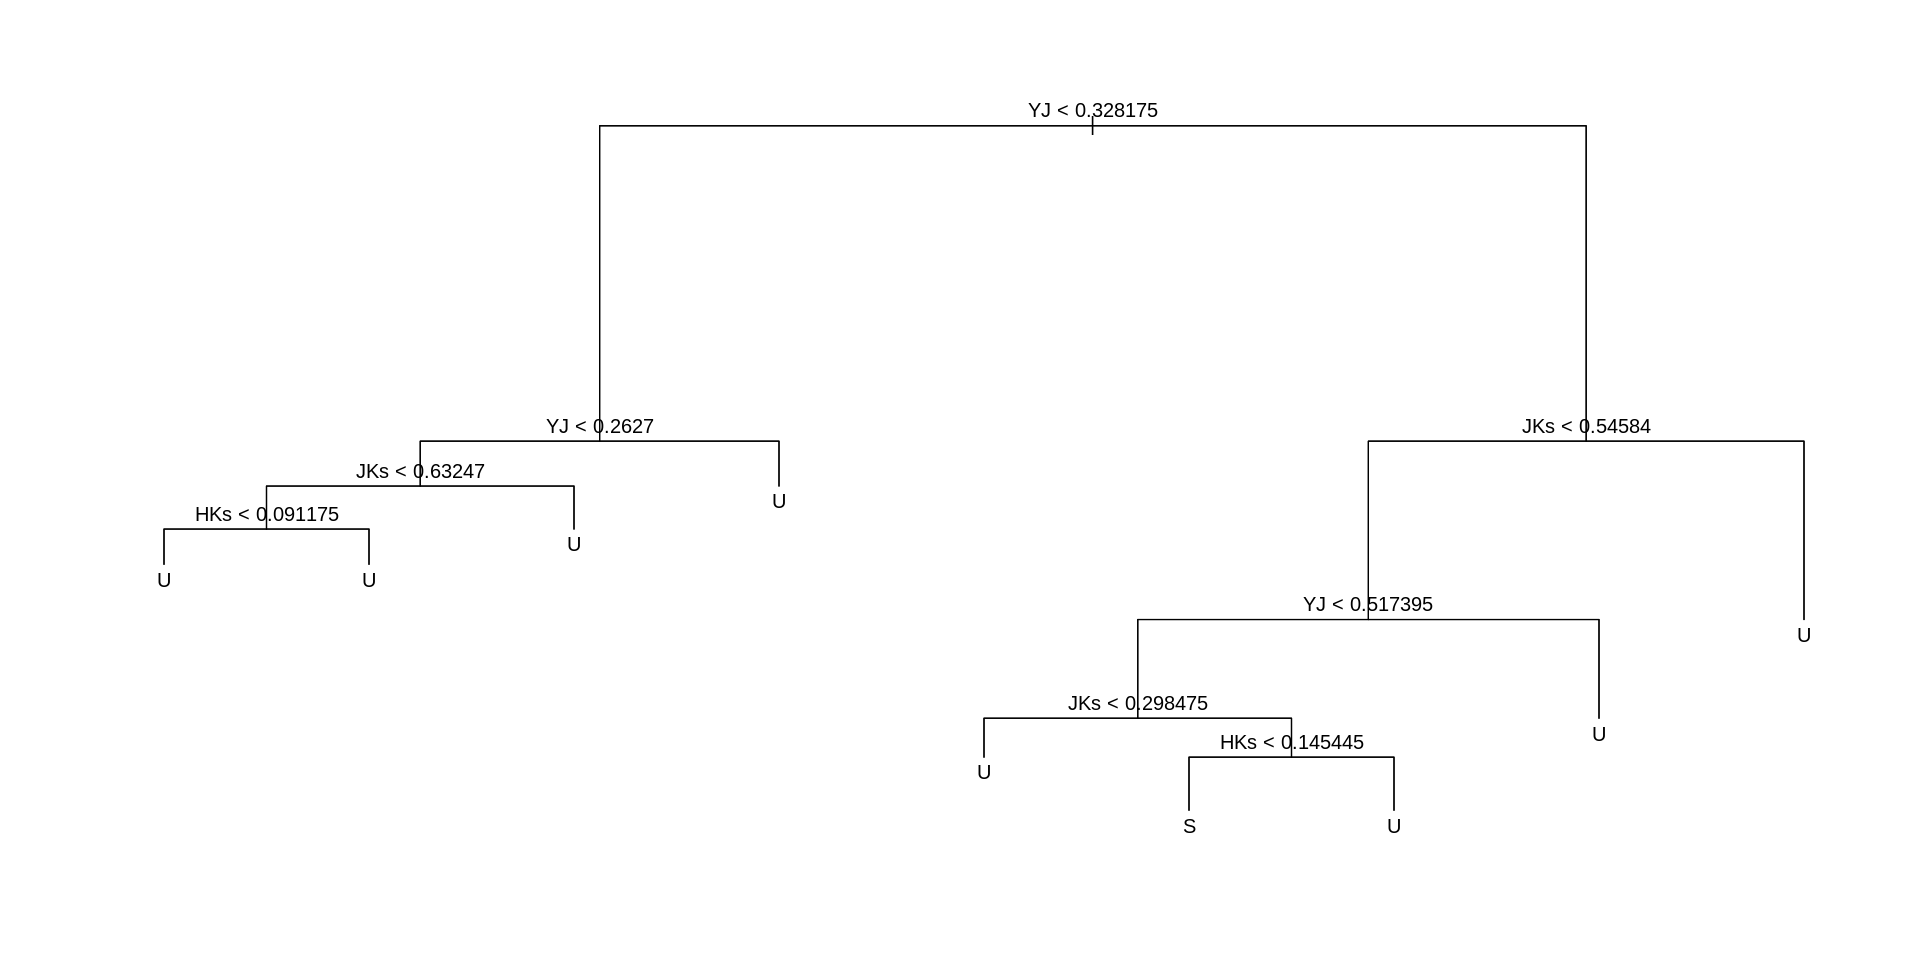

In [ ]:
plot(arv)
text(arv)

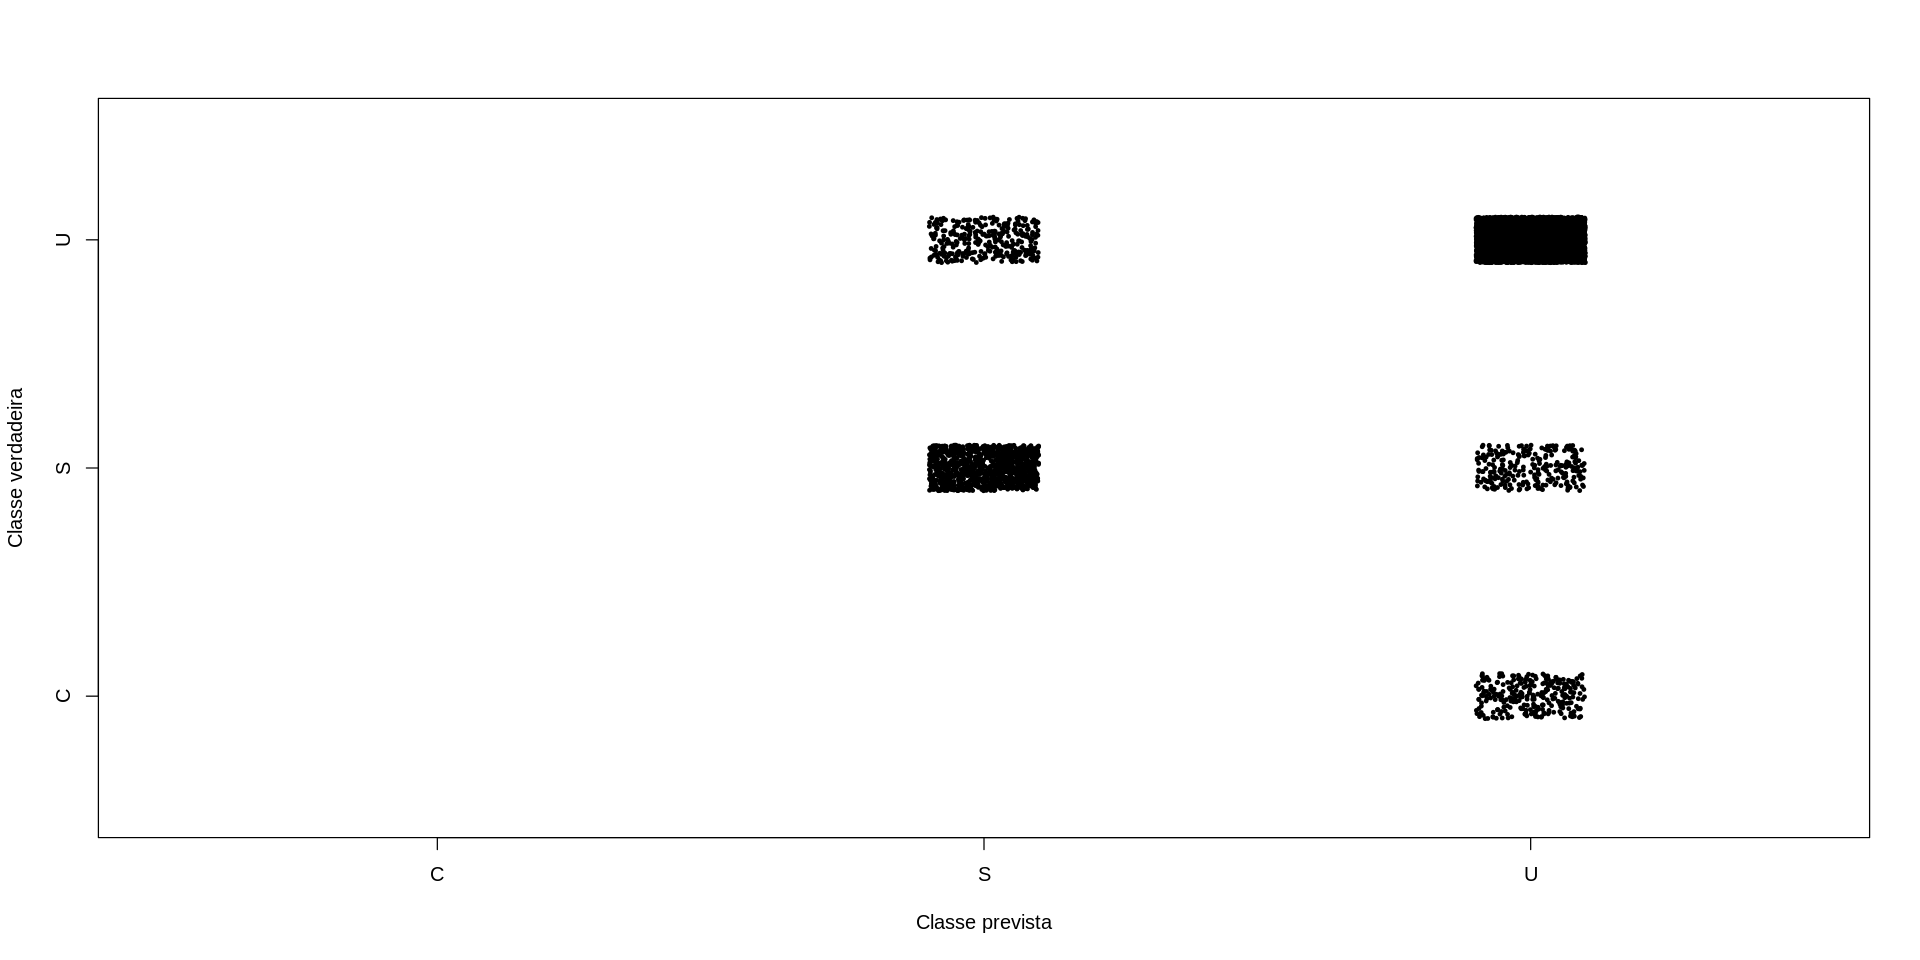

In [ ]:
pred = predict(arv, type = "class")
asteroid$Class = as.factor(asteroid$Class)

plot(jitter(as.numeric(pred), factor=0.5),
     jitter(as.numeric(asteroid$Class), factor=0.5),
     pch=20, cex=0.6,
     xlab='Classe prevista', ylab='Classe verdadeira',
     xlim=c(0.5, 3.5),
     ylim=c(0.5, 3.5),
     axes=FALSE)

axis(1, at=1:3, labels=levels(asteroid$Class))
axis(2, at=1:3, labels=levels(asteroid$Class))
box()

# 10) Gaspar et al. (2003) publicaram dados de fotometria de estrelas do aglomerado NGC 2126. Esses dados estão no arquivo ngc2126.dat. Nesta análise, use apenas as componentes de movimento próprio (pmRA e pmDE). Nem todas as estrelas dessa tabela são membros reais de NGC 2126; a rigor, a maioria não deve ser. Para a análise, considere que toda estrela com movimento próprio total nulo provavelmente são estrelas mais distantes e não pertencem ao aglomerado. Entre as estrelas restantes, ainda deve haver algumas intrusas que se encontrem entre nós e o aglomerado; contudo, como o aglomerado se move de forma coesa, ele possui um valor bem marcado em pmRA e pmDE, e as estrelas intrusas serão outliers na distribuição dessas componentes. Use um método de densidade por kernel bidimensional para representar a densidade das estrelas no espaço de componentes do movimento próprio. Estime o movimento próprio mais provável desse aglomerado a partir das coordenadas (pmRA, pmDE) de maior densidade no seu gráfico. Anote-as no gráfico com o símbolo + vermelho, em tamanho cex = 2.5.

In [ ]:
ngc = read.table('/content/ngc2126.dat', sep='|', header=T)

In [ ]:
mask = sqrt(ngc$pmDE**2+ngc$pmRA**2)>0
sample = ngc[mask,]

In [ ]:
model = Mclust(sample[,4:5],modelNames = 'VVV')
model$parameters$mean

pmRA,-6.517683,-4.151874,-0.9629393
pmDE,-4.262831,4.439619,-13.9000586


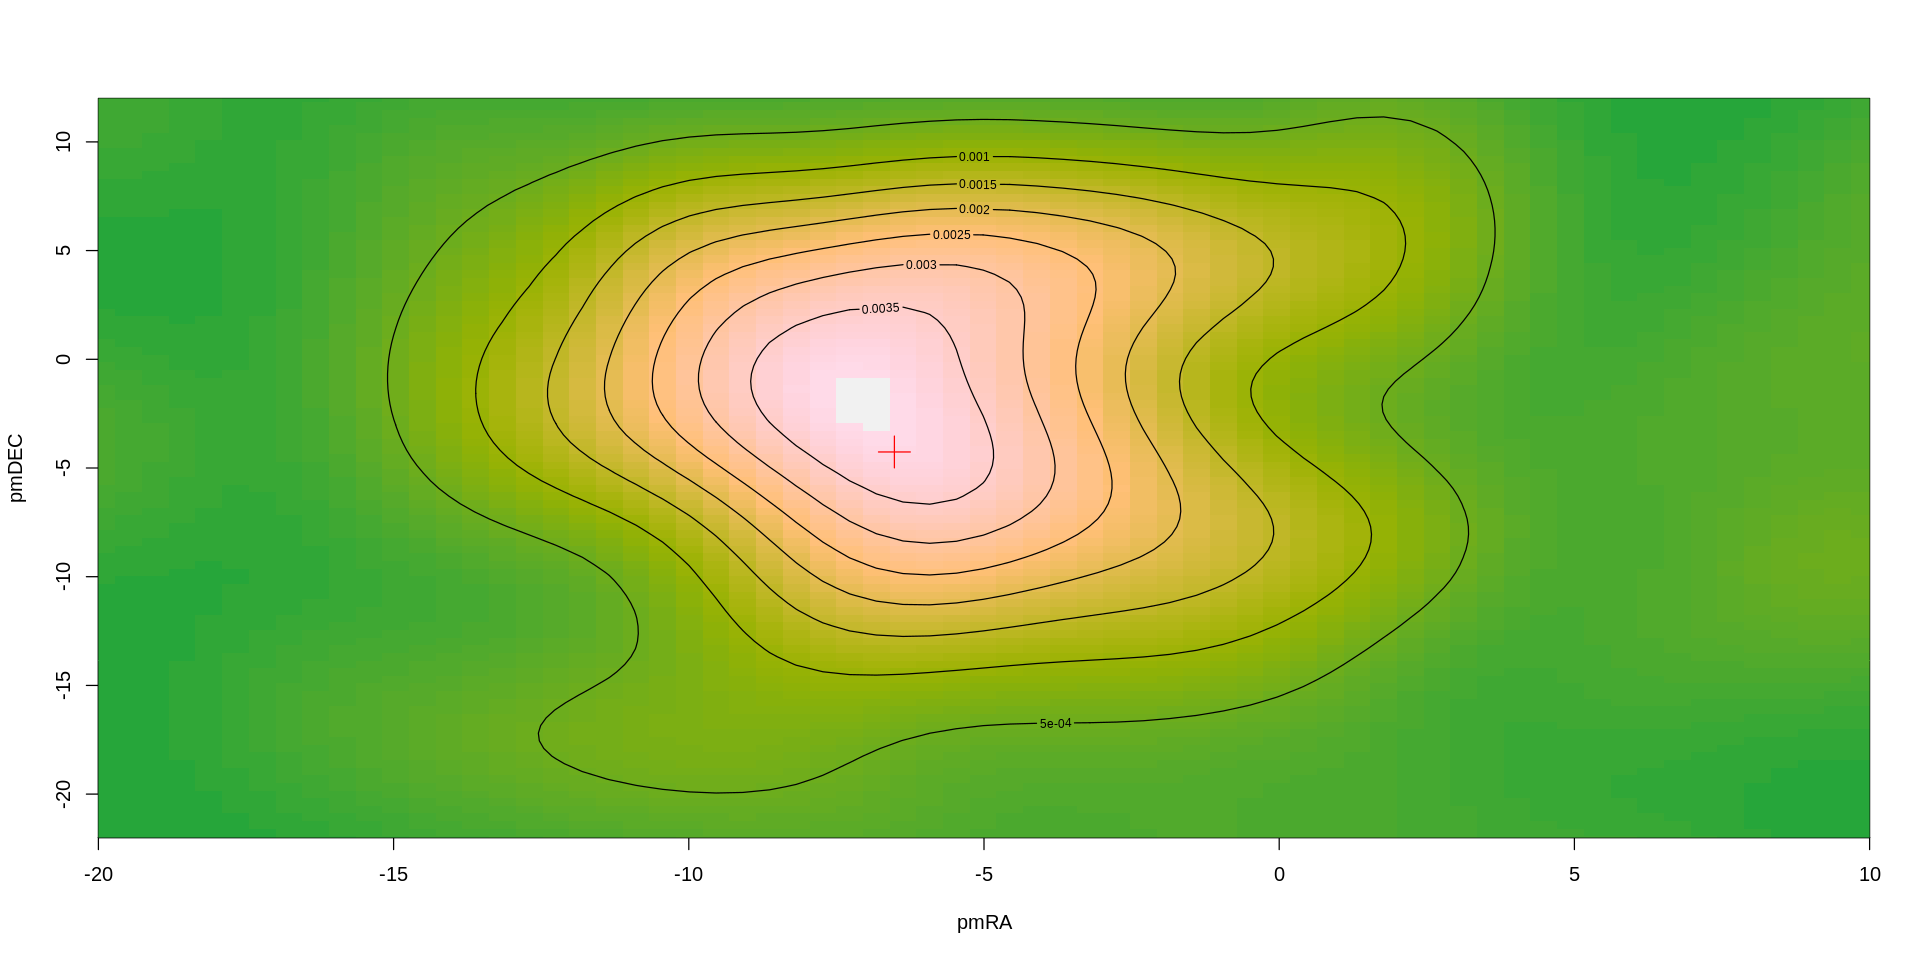

In [ ]:
kde = kde2d(sample$pmRA, sample$pmDE, n=200)
image(kde, xlab='pmRA', ylab='pmDEC',col = hcl.colors(100, "terrain"),
xlim=c(-20,10),ylim=c(-22,12))
#https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/image
contour(kde,add=T)
points(model$parameters$mean[1,1],model$parameters$mean[2,1],pch=3,
cex=2.5,col='red')